In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
def funcion_analitica(x):
    return np.sin(x)

## Segmentacion 

Por cada par de puntos adyacentes, hasta un total de (N-1) funciones, haciéndolas pasar obligatoriamente por los puntos que van a determinarlas, es decir, la función P(x) será el conjunto de segmentos que unen nodos consecutivos; es por ello que nuestra función será continua en dichos puntos, pero no derivable en general.


# Lineal

Las funciones  interpoladores son lineales en cada segmento k


$P_{k}(x) = ax +b$

In [3]:
def segm_lineal(n,a,h,punto):
    """Guarda los polinomios, devuelve estimacion en x
    n = Numero de puntos en malla
    a = Punto de inicio del intervalo
    h = distancia entre nodos de la malla
    yl = valor de los puntos evaluados en la funcion
    """
    #Encontrar segmento donde esta el punto x que queremos estimar
    k = int((punto-a)/h)
    print "K: ",k
    xk = a + (k-1)*h
    xk_1 = xk+h
    yk = funcion_analitica(xk)
    yk_1 = funcion_analitica(xk)
    polinomio = yk +(yk_1 - yk)*(symbols('x')-xk)/h
    estimacion = yk +(yk_1 - yk)*(punto-xk)/h
        
    return polinomio, estimacion
            
n = 1000
a, b = 0, np.pi
punto = 1.
h = (b-a)/n
polinomio, estimacion = segm_lineal(n,a,h,punto)
print "Polinomio lineal: ",polinomio
print "Valor de la funcion evaluada en ", punto,": ",funcion_analitica(punto), "Valor estimado segmentacion lineal: ",estimacion

K:  318
Polinomio lineal:  0.839240452652382
Valor de la funcion evaluada en  1.0 :  0.841470984808 Valor estimado segmentacion lineal:  0.839240452652


# Cuadrática

Las funciones  interpoladores son cuadráticas en cada segmento k

$P_{k}(x) = ax^{2} +bx + cy$

In [4]:
def segm_cuad(n,a,h,punto):
    """Guarda los polinomios, devuelve estimacion en x
    n = Numero de puntos en malla
    a = Punto de inicio del intervalo
    h = distancia entre nodos de la malla
    yl = valor de los puntos evaluados en la funcion
    """
    #Encontrar segmento donde esta el punto x
    k = int((punto-a)/h)
    print "K: ",k
    xk = a + (k-1)*h
    xk_1 = xk+h
    xk_2 = xk + 2*h
    yk = funcion_analitica(xk)
    yk_1 = funcion_analitica(xk)
    yk_2 = funcion_analitica(xk_2)
    
    polinomio = yk + (yk_1 - yk)*((symbols('x')-xk)/h ) + (yk_2-2*yk_1+yk)*(symbols('x')-xk)*(symbols('x')-xk_1)/h**2
    
    estimacion = yk +(yk_1 - yk)*((punto-xk)/h ) +(yk_2-2*yk_1+yk)*(punto-xk)*(punto-xk_1)/h**2
        
    return polinomio, estimacion
            
n = 1000.
a, b = 0, np.pi
punto = 1.
h = (b-a)/n

polinomio, estimacion = segm_cuad(n,a,h,punto)
print "Polinomio cuadratico: ",polinomio
print "Valor: ",funcion_analitica(punto), "Valor estimado segmentacion cuad: ",estimacion

K:  318
Polinomio cuadratico:  101321.183642338*(0.00339995950805061*x - 0.00338596823671928)*(x - 0.999026463841554) + 0.839240452652382
Valor:  0.841470984808 Valor estimado segmentacion cuad:  0.84062054936


# Splines

Un spline es una curva definida en cada  segmento mediante polinomios, requiriendo solamente el uso de polinomios de bajo grado, **evitando así las oscilaciones** encontradas al interpolar mediante polinomios de grado elevado.

### Splines cúbicos


Cada polinomio P(x) a través del que construimos los Splines en [m,n] tiene grado 3. 

$S(x) = ax^{3} + bx^{2} + cx + d$

En este caso vamos a tener **cuatro variables por cada intervalo (a,b,c,d)**, y una nueva condición para cada
punto común a dos intervalos, respecto a la derivada segunda:

- Que las partes de la función a trozos P(x) pasen por ese punto. Es decir, que las dos Pn(x) que
rodean al f(x) que queremos aproximar, sean igual a f(x) en cada uno de estos puntos.

$S_{3_{k}}(x)= f(x) =S_{3_{k+1}}(x) $


- Que la derivada en un punto siempre coincida para ambos "lados" de la función definida a trozos que
pasa por tal punto común.

$S_{3_{k}}^{1}(x) =S_{3_{k+1}}^{1}(x) $


- Que la derivada segunda en un punto siempre coincida para ambos "lados" de la función definida a
trozos que pasa por tal punto común.

$S_{3_{k}}^{2}(x) =S_{3_{k+1}}^{2}(x)$

Como puede deducirse al compararlo con el caso de splines cuadráticos, ahora no nos va a faltar una sino
dos ecuaciones (condiciones) para el número de incógnitas que tenemos.


La forma de solucionar esto, determina el carácter de los splines cúbicos. Así, podemos usar:

### Splines cúbicos naturales:

La forma más típica. 
- **La derivada segunda de S se hace 0** para el primer y último punto sobre el que está definido el conjunto de Splines, esto son, los puntos m y n en el intervalo [m,n].

$S_{3}^{2}(x_{0}) = 0 = S_{3}^{2}(x_{n})$


- Dar los valores de la derivada segunda de m y n de forma "manual", en el conjunto de splines
definidos en el intervalo [m,n].

$S_{3}^{1}(x_{0}) = f^{1}(x_{0}) $

$S_{3}^{1}(x_{n}) = f^{1}(x_{n}) $


- Hacer iguales los valores de la derivada segunda de m y n en el conjunto de splines definidos en el
intervalo [m,n]

### Splines cúbicos sujetos: 

La derivada primera de S debe tener el mismo valor que las derivadas primeras de la función para el primer y último punto sobre el que está definido el conjunto de Splines, esto son, los puntos m y n en el intervalo [m,n].

$S_{3}^{1}(x_{0}) = f^{1}(x_{0}) $

$S_{3}^{1}(x_{n}) = f^{1}(x_{n}) $

In [5]:
def splines(xn,f):
    """Interpolacion con splines cúbicos
    
    Entradas:
    
    x = nodos de malla 
    f = funcion analitica
    
    Salida:
    
    n-1 splines(S_i i = 0..n-2 )  de grado 3 para interpolar 
    
    """
    n = len(xn) #n = Numero de puntos en malla
    yn = f(xn) 
    
    h,b = np.zeros(n-1),np.zeros(n-1)
    #Encontrar los coeficientes zi de un  spline cubica
    for i in range(n-1):
        h[i] = xn[i+1]-xn[i]
        b[i] = 6.0*(yn[i+1]-yn[i])/h[i]
    
    u, v= np.zeros(n-1), np.zeros(n-1)
    z = np.zeros(n)
    z[0], z[n-1] = 0, 0 # cubico natural z0=zn=0
    
    u[0] = 2.0*(h[0]+h[1])
    v[0] = b[1]-b[0]
    
    for i in range(1,n-1):
        u[i] = 2.*(h[i]+h[i-1])- (h[i-1]**2)/u[i-1]
        v[i] = b[i]-b[i-1]-(h[i-1]*v[i-1])/u[i-1]
        
    for i in range(n-2,0,-1):
        z[i] = v[i]-(h[i]*z[i+1])/u[i]
    
    #Polinomios interpoladores Si
    s = []
    x = symbols('x')
    for i in range(n-1):
        si = z[i]/(6.*h[i] )*(xn[i+1]-x)**3 +  z[i+1]/(6.*h[i])*(x-xn[i])**3 + (yn[i+1]/h[i]+(z[i+1]*h[i])/6.)*(x-xn[i])+(yn[i]/h[i]+(z[i]*h[i])/6.)*(xn[i+1]-x)
        s.append(si)
    
    return s

In [6]:
xn = np.linspace(0.,2.*np.pi,15)
s = splines(xn,funcion_analitica)

In [7]:
#print s
print len(s)

14


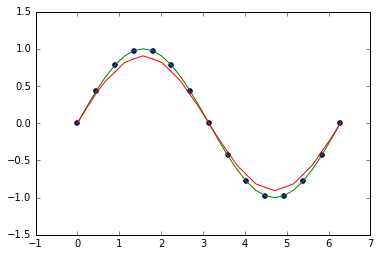

In [8]:
from sympy.abc import x

for i in range(len(s)):
    #print i
    puntos = np.linspace(xn[i], xn[i+1],3)
    
    expr = s[i]
    f_s = lambdify(x, expr)
    y_s = f_s(puntos)
    
    plt.plot(puntos,funcion_analitica(puntos),c ="green")
    plt.plot(puntos,y_s,c ="red")
    #print xnn

plt.scatter(xn, funcion_analitica(xn))

## Bibliografía 

- Apuntes Ilia 
- http://interpolacion.wikidot.com/spline-cubica
- http://www.uv.es/~diaz/mn/node40.html